# パーセプトロンを用いた最初の機械学習

#### 1. 必要なモジュールをインポートします

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pyplot as plt

#### 2. パーセプトロンを実装します
パーセプトロンは、入力されたデータと重みの積の総和を求め、その値をステップ関数にかけた値を出力します。(今回は、0または1が出力されます。)  
つまり、パーセプトロンは２値分類が可能です。  
出力値が正解値と異なる場合、重みを更新します。
$$ \Delta\omega = \eta(answer-output)x $$
$$ \omega := \omega + \Delta\omega $$

In [2]:
class Perceptron:
    
    """This class express Perceptron model.
    Perceptron can classify input-data into two values.
    Two values are 0 and 1, so using fit method, give target data just included 1 or 0.
    
    params
        learning_rate; default: 0.01, type: float, expected bigger than 0 and smaller than 1.
        epochs; default: 10, type: integer.
    """
    
    
    def __init__(self, learning_rate=0.01, epochs=10):
        
        self.eta = learning_rate
        self.epochs = epochs
        self.errors = []
    
    
    def fit(self, X, target):
        
        """Traning model."""
        
        X_shape = X.shape
        self.w_ = np.random.normal(loc=0., scale=0.01, size=X_shape[1] + 1)
        
        for _ in range(self.epochs):
            
            error_count = 0
            for xi, yi in zip(X, target):

                total_input = self.calculate_sigma(xi)
                output = self.one_step_func(total_input)
                delta_w, error = self.calculate_delta_w(xi, yi, output)
                error_count += int(error != 0) 
                self.update_w(delta_w)
            
            self.errors.append(error_count)
    
    
    def calculate_sigma(self, xi):
        
        """Calculate the sum of products of input values and weights."""
        
        sigma = np.dot(xi, self.w_[1:]) + self.w_[0]
        return sigma
    
    
    def one_step_func(self, sigma):
        
        """Separate data from sigma into 1 or 0."""
        
        return np.where(sigma >= 0, 1, 0)
    
    
    def calculate_delta_w(self, xi, yi, output):
        
        """Calculate the variation of weights."""
        
        xi = [1] + xi
        error = yi - output
        delta_w = self.eta * error * xi
        return delta_w, error
        
    
    def update_w(self, delta_w):
        
        """Update weights."""
        
        self.w_[1:] += delta_w
    
    
    def predict(self, xi):
        
        """Predict the answer."""
        
        sigma = self.calculate_sigma(xi)
        return self.one_step_func(sigma)


#### 3. モデルを学習します
scikit-learnのIris-datasetsを使用しますが、このデータセットには３つの目的変数があります（３種類の花があります）。
パーセプトロンは２値分類機なので、このうち２つしか使用しません。  
つまり、0~99番目データを使用します。

In [3]:
model = Perceptron()
iris = datasets.load_iris()
X = iris.data[:100]
t = iris.target[:100]
X_train, X_test, t_train, t_test = train_test_split(X, t, stratify=t)

model.fit(X_train, t_train)

#### 4. 学習過程を表示します

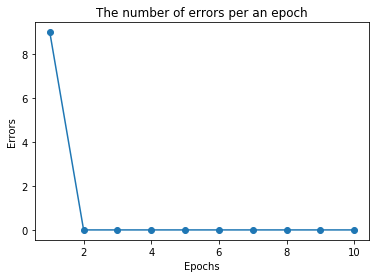

In [4]:
plt.title('The number of errors per an epoch')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.plot(range(1, model.epochs+1), model.errors, marker='o')

#### 5. モデルを評価します

In [5]:
correctness = 0
for x, t in zip(X_test, t_test):
    output = model.predict(x)
    correctness += np.where(output == t, 1, 0)

print(f'accuracy = {correctness / len(X_test)}')

accuracy = 1.0
